# Decision Tree Classifiers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

# You need to install the pip Python package
%pip install graphviz

# You also need to download graphviz from https://graphviz.org/download/
# and you must then add directory path to dot.exe to system path

## Purity Measures
We need to find a quantity that is minimised when the two classes are equally separated

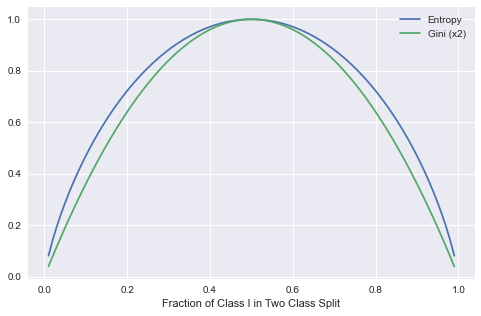

In [2]:
r=np.linspace(0.01,0.99,100)
e=-r*np.log2(r)-(1-r)*np.log2(1-r)
g=2.0*((1-r*r)-(1-r)**2)

plt.figure(figsize=(8,5))
plt.plot(r,e,label="Entropy")
plt.plot(r,g,label="Gini (x2)")
plt.xlabel('Fraction of Class I in Two Class Split')
plt.legend();

## Visualisation

In [3]:
m=250

In [4]:
np.random.seed(10)

In [5]:
X = np.random.rand(m,2)

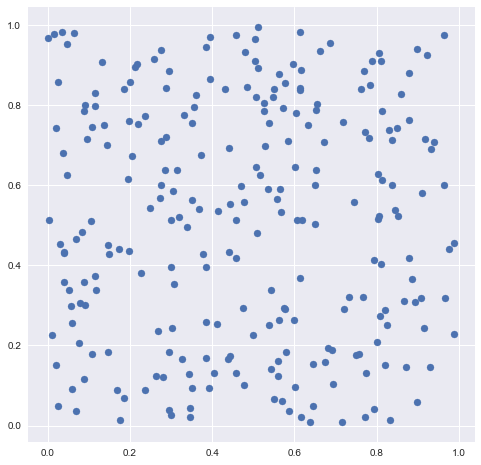

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1]);

In [7]:
y = []

for i in range(0,int(m)):
    
    xx = X[i,0]
    yy = X[i,1]
    c = 0
    
    if xx < 0.5 and yy < 0.3:
        c = 1
    
    if xx > 0.5 and yy > 0.5 and yy < 0.8:
        c = 1

    if xx > 0.5 and xx < 0.7 and yy > 0.8:
        c = 1
        
    y.append(c)

Text(0, 0.5, 'Y')

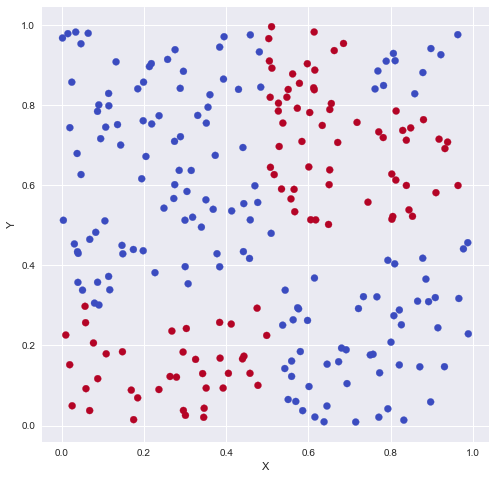

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.coolwarm)
plt.xlabel("X")
plt.ylabel("Y")

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from graphviz import Source

In [10]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X, y)

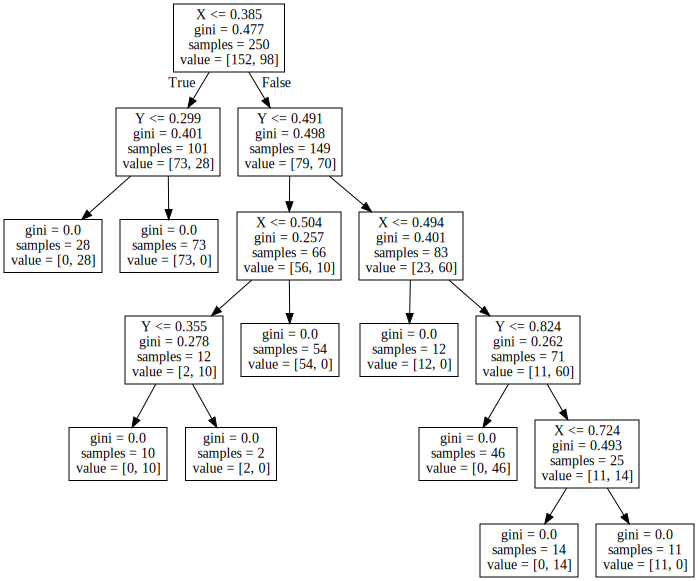

In [11]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names=['X','Y']))
SVG(graph.pipe(format='svg'))

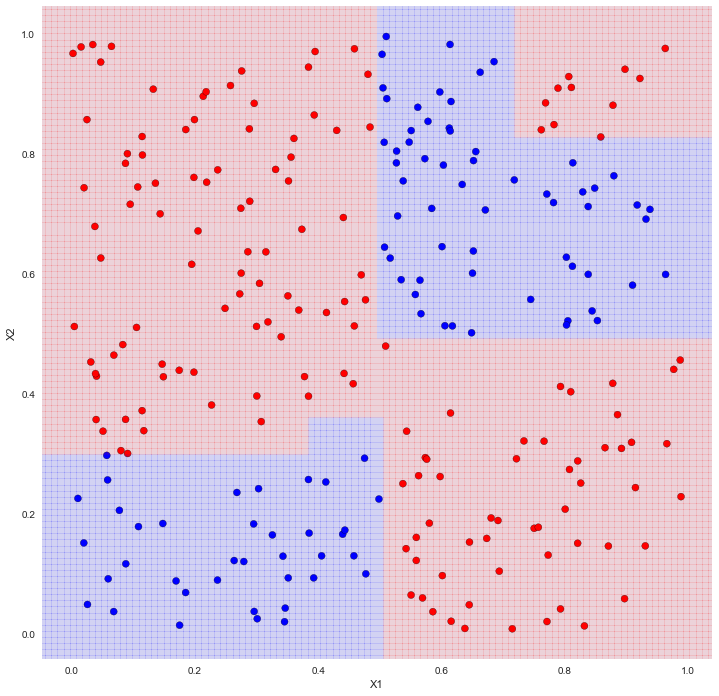

In [12]:
import HelpfulFunctions as hp
df = pd.DataFrame(X)
df.columns = ['X1','X2']
plt.figure(figsize=(12,12));
hp.featureSpacePlot('X1','X2',df,y,clf,plt);

## Using a Decision Tree Classifier on Iris Dataset

In [13]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [14]:
from sklearn.datasets import load_iris
import pandas as pd
    
iris = load_iris()
X = pd.DataFrame(iris.data)
y = iris.target
X.columns = ['sepalLength','sepalWidth','petalLength','petalWidth']
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X.shape

(150, 4)

### Using Three Features to Predict Virginica

In [16]:
X_3 = X[['petalLength','petalWidth','sepalLength']]

In [17]:
# I only want a binary classification to start with
y_3 = (np.array(y)).astype(np.int)

<ipython-input-17-2d1b8c206ea5>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_3 = (np.array(y)).astype(np.int)


In [18]:
y_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
clf = DecisionTreeClassifier(random_state=235, max_depth=7)
clf = clf.fit(X_3, y_3)

In [20]:
y_pred  = clf.predict(X_3)

The decision tree will perfectly fit the training data.

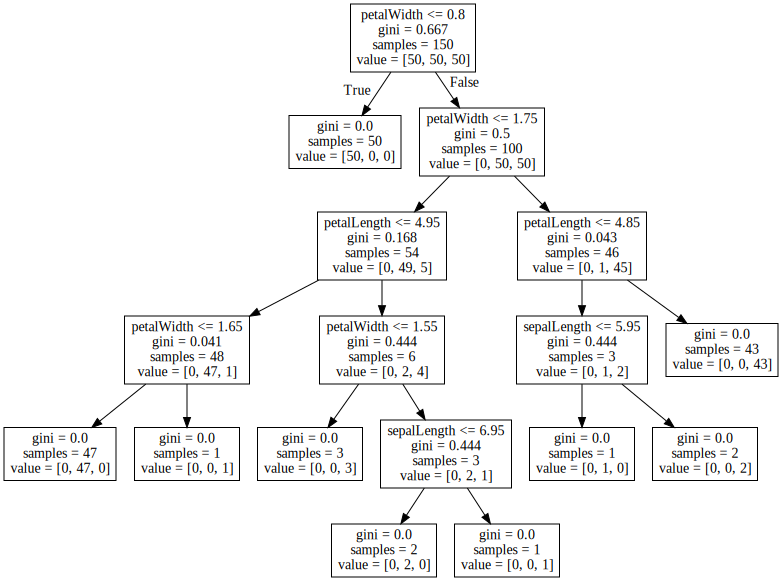

In [21]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_3.columns))
SVG(graph.pipe(format='svg'))

In [22]:
confusion_matrix(y_3, y_pred)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

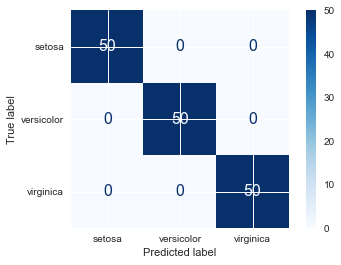

In [23]:
hp.plot_cm(clf, X_3, y_3, display_labels=['setosa','versicolor','virginica'])

We can fit the data exactly.

### Using Two Features to Predict Virginica

In [24]:
X_2 = X[['sepalLength','sepalWidth']]

In [25]:
# I only want a binary classification to start with
y_2 = (np.array(y)==2).astype(np.int)

<ipython-input-25-37048030ff49>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_2 = (np.array(y)==2).astype(np.int)


In [26]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_2, y_2)

In [27]:
y_pred  = clf.predict(X_2)

In [28]:
confusion_matrix(y_2, y_pred)

array([[99,  1],
       [10, 40]], dtype=int64)

In [29]:
print(classification_report(y_2,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       100
           1       0.98      0.80      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.90      0.91       150
weighted avg       0.93      0.93      0.92       150



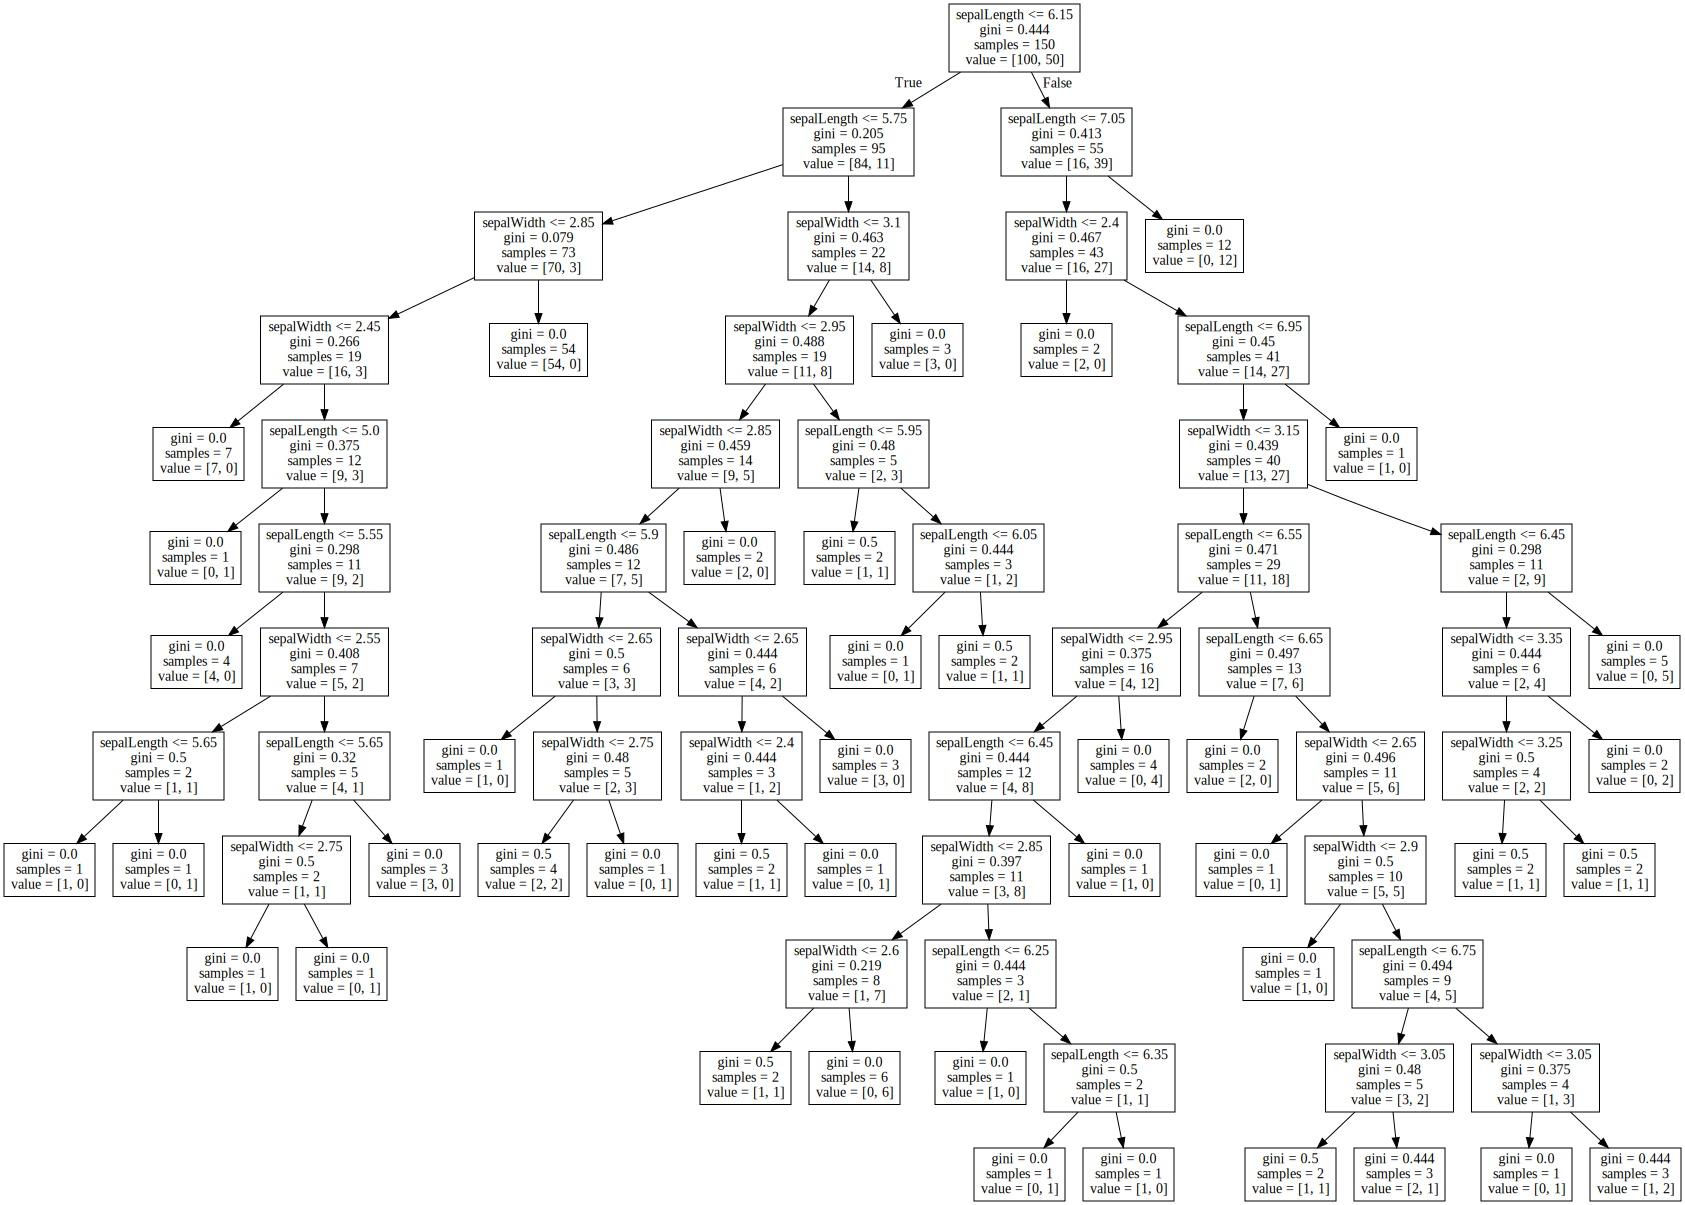

In [30]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X_2.columns))
SVG(graph.pipe(format='svg'))

In [31]:
X_2['y_2'] = y_2
X_2 = X_2.sort_values(['sepalLength', 'sepalWidth'])

<ipython-input-31-8b1264efcffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2['y_2'] = y_2


In [32]:
X_2[80:100]

,sepalLength,sepalWidth,y_2
61,5.9,3.0,0
149,5.9,3.0,1
70,5.9,3.2,0
62,6.0,2.2,0
119,6.0,2.2,1
83,6.0,2.7,0
78,6.0,2.9,0
138,6.0,3.0,1
85,6.0,3.4,0
134,6.1,2.6,1


There are duplicate rows with different labels at [6.0, 2.2].

### Using Four Features to Predict Virginica

In [33]:
clf = DecisionTreeClassifier(max_depth=5, random_state=234)
clf = clf.fit(X, y_2)

In [34]:
y_pred  = clf.predict(X)

In [35]:
cm = confusion_matrix(y_2, y_pred)

In [36]:
print(cm)

[[100   0]
 [  0  50]]


The Decision Tree has the ability to do a perfect fit.

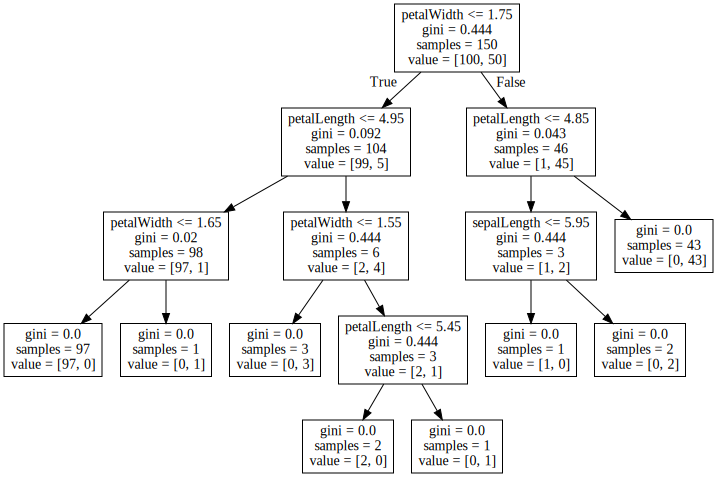

In [37]:
from IPython.display import SVG
graph = Source(export_graphviz(clf, out_file=None, feature_names = X.columns))
SVG(graph.pipe(format='svg'))

We can fit the training data exactly.

## Multiclass Classification Decision Boundary

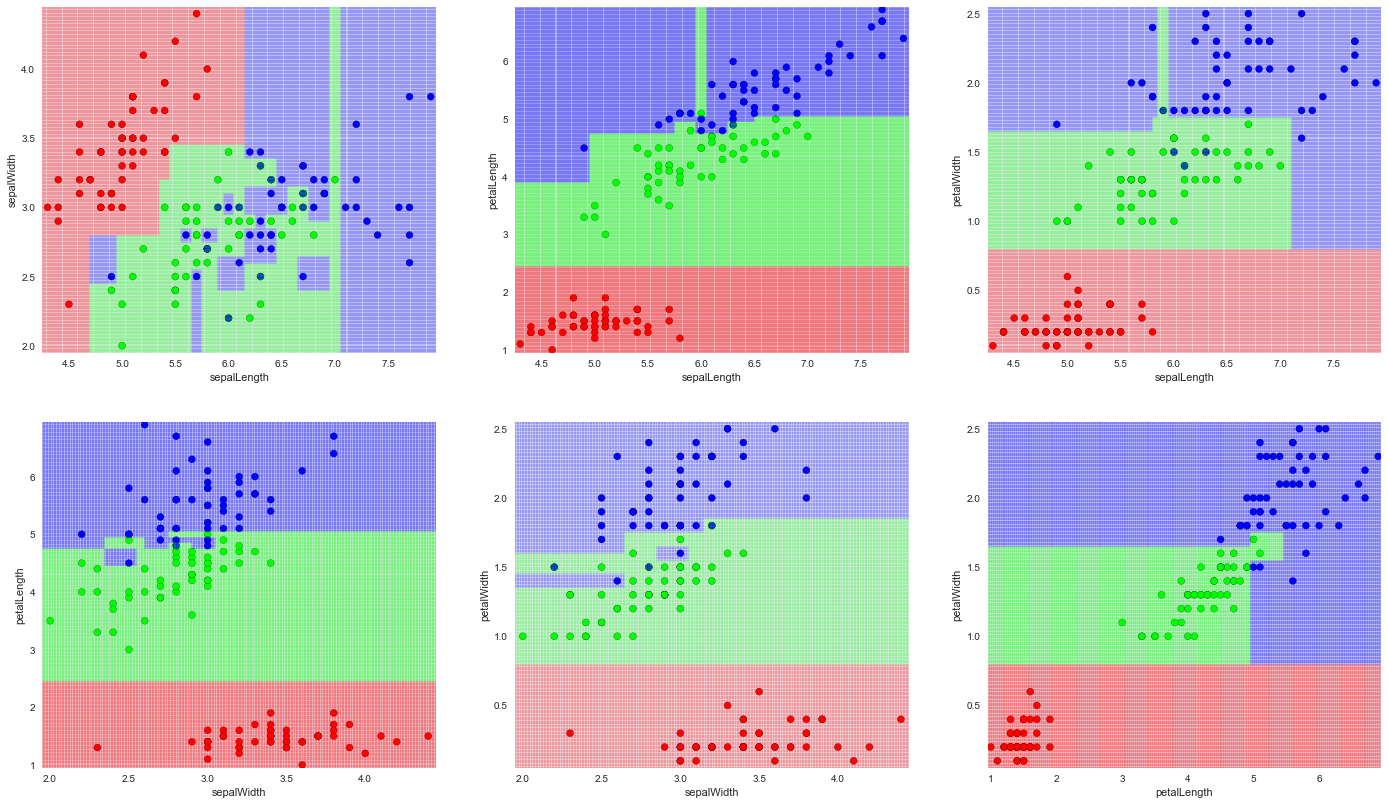

In [38]:
# Let us examine all of the Feature Space Decision Boundaries

import HelpfulFunctions as hp

plt.figure(figsize=(24,14))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    
    featureX = X.columns[pair[0]]
    featureY = X.columns[pair[1]]
    
    X_2 = X[[featureX, featureY]]

    clf = DecisionTreeClassifier()
    clf.fit(X_2, y)
    
    plt.subplot(2, 3, pairidx + 1)
    
    hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)


## Prediction Quality with Two Features

<module 'matplotlib.pyplot' from 'C:\\Users\\apala\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

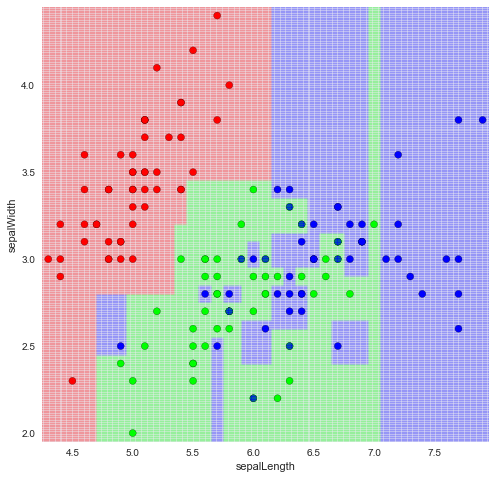

In [39]:
featureX = 'sepalLength'
featureY = 'sepalWidth'

X_2 = X[[featureX,featureY]]
y = iris['target']

clf = DecisionTreeClassifier()
clf.fit(X_2, y)
plt.figure(figsize=(8, 8))

hp.featureSpacePlot(featureX,featureY,X,y,clf,plt)

In [40]:
y_pred = clf.predict(X_2)

In [41]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0, 10, 40]], dtype=int64)

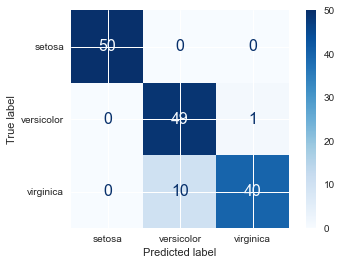

In [42]:
hp.plot_cm(clf, X_2, y, display_labels=['setosa','versicolor','virginica'])